In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\shaleens\\Desktop\\TimeSeriesUdacity\\Time Series 1\\UMTMVS.csv",
                 parse_dates=True)

In [3]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [4]:
df.index

RangeIndex(start=0, stop=335, step=1)

In [5]:
df.set_index("DATE", inplace=True)

In [6]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
       '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01'],
      dtype='object', name='DATE', length=335)

In [7]:
#Converting index to DateTimeIndex:
df.index = pd.to_datetime(df.index)

In [8]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01'],
              dtype='datetime64[ns]', name='DATE', length=335, freq=None)

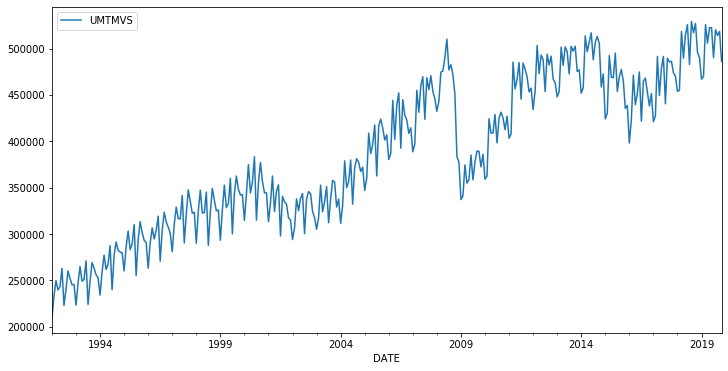

In [9]:
%matplotlib inline
df.plot(figsize=(12,6))

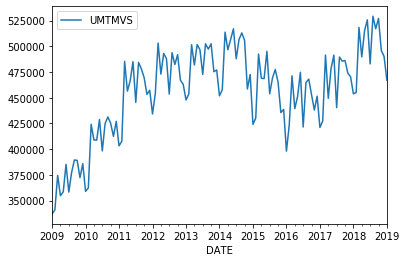

In [10]:
df['2009-01-01':'2019-01-01'].plot()

In [16]:
pct_increase = (df.loc['2019-01-01'] - df.loc['2009-01-01'])/df.loc['2009-01-01']
pct_increase

UMTMVS    0.385252
dtype: float64

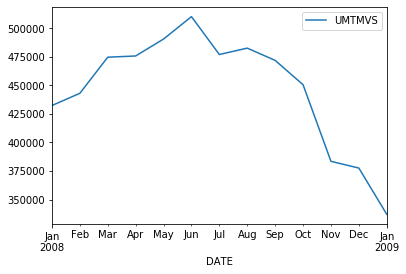

In [77]:
df['2008-01-01':'2009-01-01'].plot()

In [81]:
perc_decr = (df[df.index == '2008-01-01']['UMTMVS'].values - df[df.index == '2009-01-01']['UMTMVS'].values)/df[df.index == '2008-01-01']['UMTMVS'].values

In [82]:
perc_decr = perc_decr*100
perc_decr

array([22.02277548])

In [87]:
df['2005-01-01':]['UMTMVS'].min() 
# Alternatively, df['2005-01-01':].idxmin()

337101.0

In [101]:
df[df['UMTMVS']==337101.0].index.strftime("%B").values

array(['January'], dtype=object)

In [130]:
 df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [20]:
# Which 6 months have highest value:

df.sort_values(by = "UMTMVS",ascending=False)[:6]

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2019-03-01,525684.0
2018-06-01,525660.0
2019-06-01,522474.0
2019-05-01,522423.0


In [132]:
df['Year']=df.index.year

In [133]:
df.head()

,UMTMVS,Year
DATE,,
1992-01-01,209438.0,1992
1992-02-01,232679.0,1992
1992-03-01,249673.0,1992
1992-04-01,239666.0,1992
1992-05-01,243231.0,1992


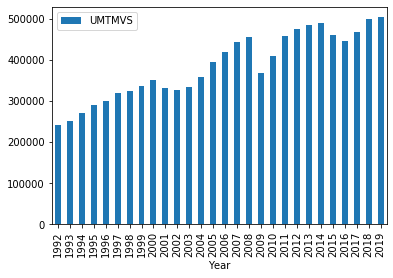

In [141]:
df.groupby('Year').mean().plot.bar()

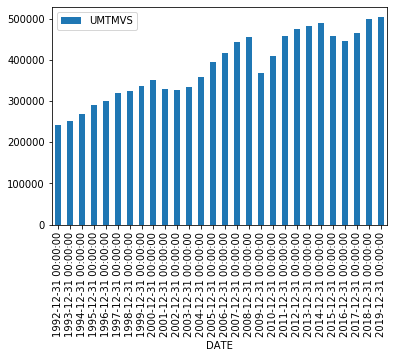

In [21]:
# Alternatively, we can directly use resample function:
df.resample('Y').mean().plot.bar()

In [ ]:
# Which year had the biggest increase in mean value from the previous years'mean value:

In [22]:
yearly_data = df.resample('Y').mean()

In [24]:
yearly_data_shift =  yearly_data.shift(1)

In [29]:
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [37]:
diff = yearly_data - yearly_data_shift
diff

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333
1997-12-31,19792.583333
1998-12-31,5426.166667
1999-12-31,11006.166667
2000-12-31,14724.750000


In [38]:
diff['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

In [172]:
df['Yearly_Roll']=df['UMTMVS'].rolling(window=12).mean()

In [173]:
df.head(20)

,UMTMVS,Year,Yealy_Roll,Yearly_Roll
DATE,,,,
1992-01-01,209438.0,1992,NaN,NaN
1992-02-01,232679.0,1992,NaN,NaN
1992-03-01,249673.0,1992,NaN,NaN
1992-04-01,239666.0,1992,NaN,NaN
1992-05-01,243231.0,1992,NaN,NaN
1992-06-01,262854.0,1992,NaN,NaN
1992-07-01,222832.0,1992,NaN,NaN
1992-08-01,240299.0,1992,NaN,NaN
1992-09-01,260216.0,1992,NaN,NaN


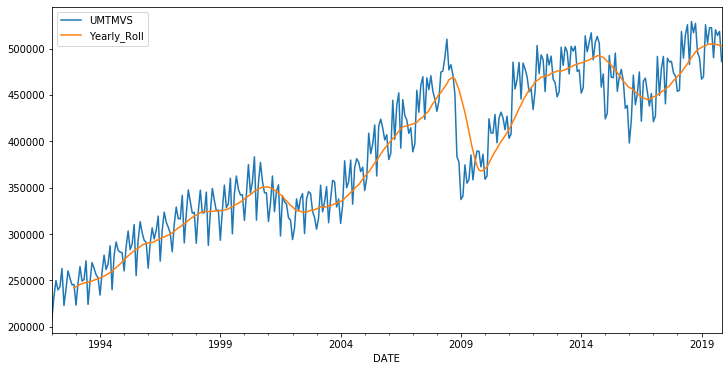

In [175]:
df[['UMTMVS','Yearly_Roll']].plot(figsize=(12,6))

In [179]:
# How many months it took to recover from the 2008 drop and to match that peak again??

In [182]:
df.drop('Yealy_Roll', axis='columns')

,UMTMVS,Year,Yearly_Roll
DATE,,,
1992-01-01,209438.0,1992,NaN
1992-02-01,232679.0,1992,NaN
1992-03-01,249673.0,1992,NaN
1992-04-01,239666.0,1992,NaN
1992-05-01,243231.0,1992,NaN
...,...,...,...
2019-07-01,490073.0,2019,505183.250000
2019-08-01,520191.0,2019,504436.083333
2019-09-01,514074.0,2019,504192.916667


In [40]:
df['2008-01-01':'2008-12-31']['UMTMVS'].idxmax()

Timestamp('2008-06-01 00:00:00')

In [239]:
val = df[df.index=='2008-06-01']['UMTMVS'].values
val

array([510081.])

In [242]:
recession = df['2008-06-01':]

In [241]:
recession

,UMTMVS,Year,Yealy_Roll,Yearly_Roll
DATE,,,,
2008-06-01,510081.0,2008,461993.250000,461993.250000
2008-07-01,476948.0,2008,466433.166667,466433.166667
2008-08-01,482530.0,2008,467612.250000,467612.250000
2008-09-01,471799.0,2008,468961.416667,468961.416667
2008-10-01,450521.0,2008,467284.750000,467284.750000
2008-11-01,383475.0,2008,461412.500000,461412.500000
2008-12-01,377578.0,2008,455749.500000,455749.500000
2009-01-01,337101.0,2009,447815.666667,447815.666667
2009-02-01,340896.0,2009,439307.333333,439307.333333


In [243]:
np.argmax(recession['UMTMVS'].values>val)

69

In [244]:
recession.index[69]

Timestamp('2014-03-01 00:00:00')